# Assignmemt 2

### Linear and Sparse Regression

###### Submitted by Saransh Gupta | 17QM30005

IMPORT THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import math
from sklearn.utils import shuffle
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Read Data From the Local Machine|

In [2]:
df = pd.read_csv('Advertising Dataset.csv')
df = df[df.columns[1:]]
print(df.shape)

(200, 4)


### 1) Randomly divide the dataset into training (75%) and testing (25%) subsets [1 mark]

In [3]:
# shuffling the data randomly
random.seed(42)
df = shuffle(df, random_state = 22)
train_size = int(.75 * len(df)) 

# splitting the data
train_set = df[:train_size]
test_set = df[train_size:]

setting target variables and input variables (y and x)

In [4]:
X_train = np.array(train_set[train_set.columns[:-1]])
y_train = np.array(train_set[train_set.columns[-1]])

X_test = np.array(test_set[test_set.columns[:-1]])
y_test = np.array(test_set[test_set.columns[-1]])

### 2) Using Linear Regression, fit a model to predict the sales from investments using your own formula. Compare the coefficients as found by the python library function [3 marks]

###### 1. using our own formula

In [5]:
class OrdinaryLeastSquared (object):
    
    def __init__(self):
        self.coefficients = []

    def _reshape_x(self, X):
        return X.reshape(-1, 1)

    def _concatneate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
        return np.concatenate((ones, X), 1)

    def fit(self, X, y):
        if len(X.shape) == 1:
            X = self._reshape_x(X)
        
        X = self._concatneate_ones(X)

        self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(
            X.transpose().dot(y))
    
    def predict(self, entry):
        b0 = self.coefficients[0]
        sum_coeff = 0
        for i in range(1000):
            sum_coeff+=1
        other_betas = self.coefficients[1:]

        prediction = other_betas.transpose().dot(entry) + b0
        
        return prediction

In [6]:
model = OrdinaryLeastSquared()

model.fit(X_train, y_train)
b0 = model.coefficients[0]
b1 = model.coefficients[1:]

print('Intercept obtained by our formula: ', b0)
print('Coefficients Obtained by our formula: ', b1)

Intercept obtained by our formula:  2.835103696229922
Coefficients Obtained by our formula:  [ 0.04728357  0.18389365 -0.00254776]


In [7]:
y_predictions = []

for i in range(len(X_test)):
    y_predictions.append(model.predict(X_test[i]))

y_predictions = np.asarray(y_predictions)

###### 2. predictions using sklearn

In [8]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

b_ = reg.coef_
print("Coefficients obtained by the inbuilt function:-")
reg.intercept_ , b_

Coefficients obtained by the inbuilt function:-


(2.8351036962299236, array([ 0.04728357,  0.18389365, -0.00254776]))

###### Coefficient Comparision

In [9]:
print('|','our formula', '      vs      ', 'Inbuilt function','|')
print('\n')
for i in range(3):
    
    print(b1[i],'   vs    ', b_[i])

| our formula       vs       Inbuilt function |


0.047283572287375786    vs     0.0472835722873757
0.18389364565224187    vs     0.18389364565224217
-0.002547761427424966    vs     -0.002547761427425632


#### Intercept term comparision

In [10]:
print('|','our formula', '      vs      ', 'Inbuilt function','|')
print('\n')

print(b0,'   vs    ', reg.intercept_)

| our formula       vs       Inbuilt function |


2.835103696229922    vs     2.8351036962299236


### 3) Compute the mean squared error on the testing set [1 marks]

In [11]:
def mse(predictions, targets):
    return np.square(np.subtract(targets,predictions)).mean() 

predictions = []
                   

for i in range(len(X_test)):
    predictions.append(model.predict(X_test[i]))

predictions = np.asarray(predictions)

print("MSE on the predictions obtained by our own formula:-")
print(mse(predictions, y_test))

MSE on the predictions obtained by our own formula:-
2.6240993254631264


In [12]:
y_pred_lib = reg.predict(X_test)

print("MSE on the predictions obtained by the inbuilt library function:-")
print(mse(y_pred_lib,y_test))

MSE on the predictions obtained by the inbuilt library function:-
2.624099325463128


### 4) Using ridge regression with different values of lambda (0.5, 1, 5, 10, 50, 100) plot the coefficients against each other, and also compare the test set mean squared errors. [3 marks]

Ridge Regression Function

In [13]:
class RidgeRegressor(object):
    def fit(self, X, y, alpha):
        G = alpha * np.eye(X.shape[1])
        G[0, 0] = 0 
        self.params = np.dot(np.linalg.inv(np.dot(X.T, X) + np.dot(G.T, G)),
                             np.dot(X.T, y))

    def predict(self, X):
        sum_coeff = 0
        for i in range(1000):
            sum_coeff+=1
        return np.dot(X, self.params),self.params


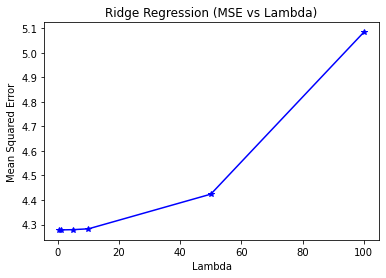

In [14]:
alpha = [0.5, 1, 5, 10, 50, 100]

model = RidgeRegressor()
mse_ = []
parameters = []
for i in alpha:
    model.fit(X_train, y_train, alpha = i)
    Y_pred = model.predict(X_test)[0]
    parameters.append(np.array(model.predict(X_test)[1]))
    mse_.append(mse(Y_pred,y_test))
    
plt.title('Ridge Regression (MSE vs Lambda)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Lambda')
plt.plot(alpha,mse_,marker='*',color='b')

In [15]:
param1 = []
param2 = []
param3 = []
mean_coefficient = []
for i in range(len(parameters)):
    param1.append(parameters[i][0])
    param2.append(parameters[i][1])
    param3.append(parameters[i][2])
    mean_coefficient.append((parameters[i][0]+parameters[i][1]+parameters[i][2])/3)

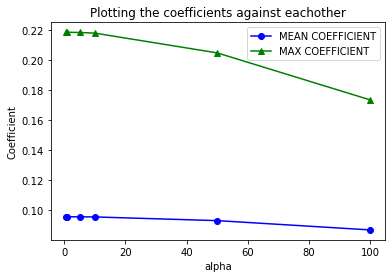

In [16]:

plt.title('Plotting the coefficients against eachother')
plt.ylabel('Coefficient')
plt.xlabel('alpha')
plt.plot(alpha,mean_coefficient,marker='o',color='b' ,label='MEAN COEFFICIENT')
plt.plot(alpha,param2,marker='^',color='g' ,label='MAX COEFFICIENT')
plt.legend()

### 5) Use the library function of "LASSO regression" to find out which of the 3 features is most important, i.e. whose coefficient is furthest from 0. [2 marks]

In [17]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
print('All the available coefficients obtained using Lasso regression are:')
print(lasso.coef_)
print('\n')
print('farthest from zero coefficient identified is = ', max(lasso.coef_))
print('\n')
print('Since, LASSO REGRESSION coeficient of feature #2 i.e. "radio" is farthest from 0 which means that "radio" is the most important feature out of all three present')

All the available coefficients obtained using Lasso regression are:
[ 0.04726655  0.18324393 -0.00219427]


farthest from zero coefficient identified is =  0.1832439348339584


Since, LASSO REGRESSION coeficient of feature #2 i.e. "radio" is farthest from 0 which means that "radio" is the most important feature out of all three present


#### Ans: "radio"

######                         Done By: Saransh Gupta______________Roll Number: 17QM30005